# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

# Contruct the Matrix Factorization Class

In [2]:
class Matrix_Factorization_(object):
    def __init__(self, R, K, lr, beta, iterations=100):
        self.R = R 
        self.num_users, self.num_items = R.shape
        self.lr = lr
        self.beta = beta
        self.iterations = iterations
        
        self.P = np.random.rand(self.num_users, K)
        self.Q = np.random.rand(self.num_items, K)
        
    def train_and_calculate_estimate(self, batch_size):
        # get the indices and values that are non-zero
        nonzero_samples = []
        for i in range(self.num_users):
            for j in range(self.num_items):
                if self.R[i,j] > 0:
                    nonzero_samples.append((i, j, self.R[i, j]))
        
        num_ratings = len(nonzero_samples)
        
        self.Q = self.Q.T
        self.training_record = []
        for iter_ in range(self.iterations):
            # sgd -> shuffle the data & spit the nonzero_samples into batches 
            np.random.shuffle(nonzero_samples)
            
            # sperate the data into batch size
            nonzero_batches = [nonzero_samples[i:i+batch_size] for i in range(0, len(nonzero_samples), batch_size)]
        
            for batch in nonzero_batches:
                for i, j, rij in batch:
                # Compute prediction and error
                    pred_rij = self.P[i, :].dot(self.Q[:, j])
                    e = rij - pred_rij
                # Update user(P) & item(Q) latent features matrices 
                    self.P[i, :] += self.lr * (2 * e * self.Q[:, j] - (1/2) * self.beta * self.P[i, :])
                    self.Q[:, j] += self.lr * (2 * e * self.P[i, :] - (1/2) * self.beta * self.Q[:, j])
            
            # Calculate the rmse 
            error = 0
            pred_full_R = np.dot(self.P, self.Q)
            for batch in nonzero_batches:
                for i, j, _ in batch:
                    error += pow(self.R[i, j] - pred_full_R[i, j], 2)
                    rmse = np.sqrt(error / num_ratings)
            self.training_record.append((iter_, rmse))
            
            if (iter_+1) % 5 == 0:
                print("Iteration:[{}/100], rmse:{}".format(iter_+1, rmse))

        return self.training_record
    
    def predict(self):
        print()
        print('Shape of PxQ:{}'.format(np.dot(self.P, self.Q).shape))
        print()        
        print('PxQ:')
        print(np.dot(self.P, self.Q))
        print()
        print('Shape of R:{}'.format(self.R.shape))
        print()
        print('R:')
        print(self.R)
        print()
    
    def plotting(self):
        import matplotlib.pyplot as plt
        %matplotlib inline
        plt.figure(figsize=(10,8))
        
        rmse = np.array([rmse for index, rmse in self.training_record])
        iteration_ = np.arange(1, self.iterations + 1, 1)
        plt.plot(iteration_, rmse, label='lr:{}'.format(self.lr))
        plt.xlabel('iteration(s)')
        plt.ylabel('rmse')
        plt.title('rmse with iteration(s)')
        plt.legend()
        plt.grid()
        
        return plt.figure

# MF with toy data
實例化 powerpoint 中的 table 為 mf_toy，並將它進行 Matrix Factorization 拆解。
<br>接著，對 mf_toy 進行 training 後，我們可去進行預測，並藉由 plotting method 繪製出 rmse 隨著 iteration 的遞減狀況。

Iteration:[100/1000], rmse:1.5154202262560452
Iteration:[200/1000], rmse:0.9511562567672894
Iteration:[300/1000], rmse:0.4008073285022082
Iteration:[400/1000], rmse:0.18842613202610273
Iteration:[500/1000], rmse:0.11387258172541671
Iteration:[600/1000], rmse:0.0772226748592893
Iteration:[700/1000], rmse:0.05580231508021045
Iteration:[800/1000], rmse:0.041961391906055065
Iteration:[900/1000], rmse:0.032413045465030425
Iteration:[1000/1000], rmse:0.025521864772129914

Shape of PxQ:(5, 4)

PxQ:
[[4.99763816 2.9885091  2.73122311 0.99875913]
 [3.99127747 2.40115542 2.40639862 0.99738621]
 [1.01916402 0.95478146 5.94377984 4.9825485 ]
 [0.99013991 0.8658268  4.81107371 3.98594601]
 [1.3081776  1.05475366 4.96531071 4.03214192]]

Shape of R:(5, 4)

R:
[[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]



<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

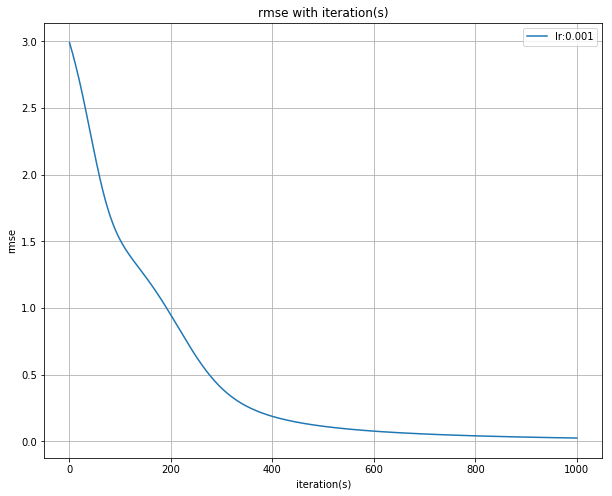

In [40]:
R_toy = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

K = 2
beta = 0.01
learning_rate = 0.001

mf_toy = Matrix_Factorization_(R_toy, K=K, beta=beta,lr=learning_rate)
mf_toy.train_and_calculate_estimate(1)
mf_toy.predict()
mf_toy.plotting()

# Compare the Rmse with different learning rates
在前一個 kernel，是使用固定的 hyper-parameters 去建構 model，而在此我們固定住 learning rate 之外的超參數，
<br> 去觀察在固定的 iterations 中，learning rate 為多少時能造成 rmse 降至最低，收斂較快。
<br> 由圖可知，當 learning rate 為 0.01時收斂最快。
<br> 而當大於 0.05時，最終都會收斂至相近的結果。

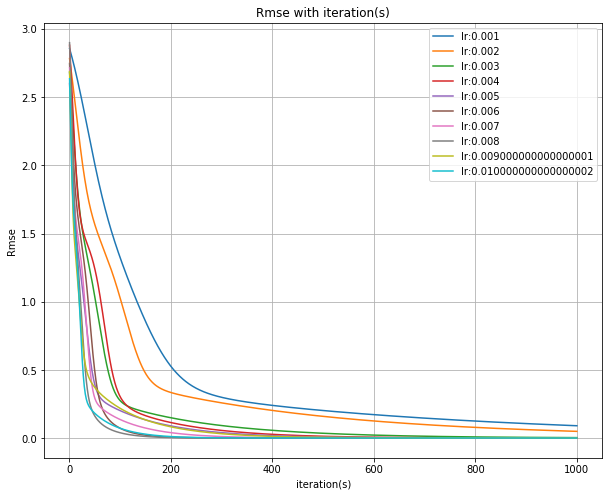

In [21]:
def Matrix_Factorization(R, K, lr, beta, iterations = 1000):
    num_users, num_items = R.shape
    
    # Initialize the P and Q matrix
    P = np.random.rand(num_users, K)
    Q = np.random.rand(num_items, K)
    
    training_samples = []
    for i in range(num_users):
        for j in range(num_items):
            if R[i,j] > 0:
                training_samples.append((i, j, R[i, j]))
    
    Q = Q.T
    training_process = []
    for iter_ in range(iterations):
        np.random.shuffle(training_samples)
        for i, j, rij in training_samples:
            # Compute prediction and error
            pred_rij = P[i, :].dot(Q[:, j])
            e = rij - pred_rij
            
            # Update user(P) & item(Q) latent features matrices
            P[i, :] += lr * (2 * e * Q[:, j] - (1/2) * beta * P[i, :])
            Q[:, j] += lr * (2 * e * P[i, :] - (1/2) * beta * Q[:, j])
        
        # Calculate the rmse 
        error = 0
        pred_full_R = np.dot(P, Q)
        for i, j, _ in training_samples:
            error += pow(R[i, j] - pred_full_R[i, j], 2)
            rmse = np.sqrt(error / len(training_samples))
            
        training_process.append((iter_, rmse))
    
    rmse_ = np.array([rmse for _, rmse in training_process])
    return rmse_

                     
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])
learning_rates = np.arange(0.001, 0.011, 0.001)                     
K = 2
beta = 0.01
                     
rmses = []
for lr_ in learning_rates:
    q = Matrix_Factorization(R, K=K, beta=beta, lr=lr_)
    rmses.append(q)

plt.figure(figsize=(10,8))
for index, rmse in enumerate(rmses):
    iteration_ = np.arange(1, 1001, 1)
    plt.plot(iteration_, rmse, label='lr:{}'.format(learning_rates[index]))

plt.xlabel('iteration(s)')
plt.ylabel('Rmse')
plt.title('Rmse with iteration(s)')
plt.legend()
plt.grid()
plt.show()

# Data Preprocessing
讀取 Movielens 資料，並將它轉換成 dataframe 幫助我們對 movies_items_matrix進行思考，
<br> 最後再將他轉換成 ndarray 以便運算。

In [4]:
def from_movielens(data):
    with open(data) as file:
        rows = [line.strip() for line in file.readlines()]
        rows_ndarray = np.array([row.replace('\t', ' ').split() for row in rows])

        rating_df = pd.DataFrame(rows_ndarray, columns = ['userid', 'movieid', 'rating', 'timestamp'], dtype=int)
        del(rating_df['timestamp'])
        rating_df = rating_df.sort_values(by=['userid', 'movieid'],ascending=True)
            
        rating_df = rating_df.pivot(index = 'userid', columns ='movieid', values = 'rating').fillna(0)
        R = rating_df.values
        print('Wonderful read and transform the data!')
        print()
        
    return R

R = from_movielens('u.txt')

Wonderful read and transform the data!



In [8]:
K = 20
beta = 0.01
learning_rate = 0.005

mf_R = Matrix_Factorization_(R, K=K, beta=beta, lr=learning_rate)
mf_R.train_and_calculate_estimate(64)
print()

Iteration:[5/100], rmse:0.8748894600006186
Iteration:[10/100], rmse:0.7965924246549698
Iteration:[15/100], rmse:0.7351855269359102
Iteration:[20/100], rmse:0.6954669710249561
Iteration:[25/100], rmse:0.6690129736088664
Iteration:[30/100], rmse:0.6492549663902913
Iteration:[35/100], rmse:0.6362036464198613
Iteration:[40/100], rmse:0.6250612333110233
Iteration:[45/100], rmse:0.6173163160316563
Iteration:[50/100], rmse:0.6090066621897021
Iteration:[55/100], rmse:0.604345083463963
Iteration:[60/100], rmse:0.5982662532775646
Iteration:[65/100], rmse:0.5956386538486748
Iteration:[70/100], rmse:0.5911180434704665
Iteration:[75/100], rmse:0.5879734174719986
Iteration:[80/100], rmse:0.5845098102756376
Iteration:[85/100], rmse:0.5830035265349018
Iteration:[90/100], rmse:0.5795783884682414
Iteration:[95/100], rmse:0.5788587168006313
Iteration:[100/100], rmse:0.5755579339140996



<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

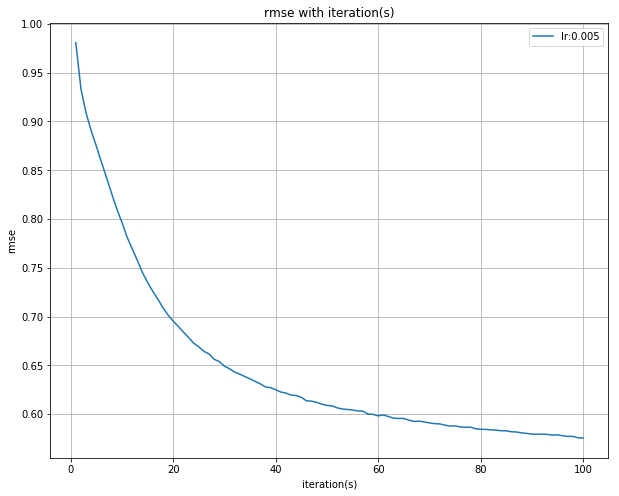

In [9]:
mf_R.plotting()

In [10]:
mf_R.predict()


Shape of PxQ:(943, 1682)

PxQ:
[[4.024001   3.48789112 4.43896195 ... 1.84953668 3.15631753 3.28579015]
 [4.16784943 3.06268514 3.51756396 ... 2.99104677 4.02533536 3.54568994]
 [3.33388537 0.93824651 5.3852478  ... 3.31540118 3.3527036  0.99692073]
 ...
 [4.44273379 3.68977494 3.22331538 ... 3.08012936 3.22407454 3.31588134]
 [4.85708873 4.40877043 3.44714041 ... 3.09888211 3.87642113 3.26666704]
 [3.75108696 4.36784984 1.95341857 ... 2.56593911 2.33858646 2.41483036]]

Shape of R:(943, 1682)

R:
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]

